In [412]:
# the following libraries will be used for the tasks our project

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
# load the CSV file
csv_df = pd.read_csv('cancer2017.csv', encoding='ISO-8859-1')

In [416]:
# Preview the data
print(csv_df.head())

        State Brain/ nervous system Female breast Colon & rectum Leukemia  \
0     Alabama                   320           650            940      420   
1      Alaska                                 70            100           
2     Arizona                   380           810          1,020      550   
3    Arkansas                   180           420            600      250   
4  California                  1830          4440           5240     2610   

  Liver Lung & bronchus Non-Hodgkin Lymphoma Ovary Pancreas Prostate  
0   470           3,200                  320   250      710      450  
1    60             280                                80       50  
2   660           2,820                  430   310      930      600  
3   280           2,160                  210   150      430      260  
4  3750          12,000                 2140  1530     4510     3130  


In [418]:
print(csv_df.columns)

Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')


In [420]:
# Scrape Cancer.org data
cancer_url = "https://www.cancer.org/research/cancer-facts-statistics/all-cancer-facts-figures/cancer-facts-figures-2017.html#:~:text=In%202017%2C%20there%20will%20be,cancer%20deaths%20in%20the%20US"
response = requests.get(cancer_url)

In [422]:
# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')
print(f"Number of tables found: {len(tables)}")

Number of tables found: 0


In [424]:
# Extract all paragraphs
# Replace 'p' with the tag containing your data
paragraphs = soup.find_all('p')
for i, p in enumerate(paragraphs[:10]):  # Display the first 10 paragraphs
        print(f"Paragraph {i+1}:\n{p.text}\n")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

Paragraph 1:
Español

Paragraph 2:
PDFs by language

Paragraph 3:
Español

Paragraph 4:
PDFs by language

Paragraph 5:
Our 24/7 cancer helpline provides information and answers for people dealing with cancer. We can connect you with trained cancer information specialists who will answer questions about a cancer diagnosis and provide guidance and a compassionate ear. 

Paragraph 6:


Paragraph 7:
Chat live online

Paragraph 8:
Select the Live Chat button at the bottom of the page 

Paragraph 9:


Paragraph 10:
Call us at 1-800-227-2345

Failed to fetch the page. Status code: 200


In [426]:
# Fetch the webpage
response = requests.get(cancer_url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract relevant sections, e.g., text content
    all_text = [text for text in soup.stripped_strings]
    print("Cancer.org Extracted Text:")
    for i, text in enumerate(all_text[:10]):  # Preview first 10 lines
        print(f"{i + 1}: {text}")
else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

Cancer.org Extracted Text:
1: Cancer Facts & Figures 2017     | American Cancer Society
2: Skip to main content
3: ×
4: English
5: English
6: Español
7: Esta página
8: Página inicial
9: PDFs by language
10: Arabic (اللغة العربية)


In [428]:
from selenium import webdriver

In [430]:
# Set up Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [431]:
# Load the webpage
driver.get(cancer_url)

# Get the rendered HTML
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Extract all visible text
print("Extracting text from dynamically rendered webpage:")
for i, text in enumerate(soup.stripped_strings, start=1):
    print(f"Text {i}: {text}")

driver.quit()

Extracting text from dynamically rendered webpage:
Text 1: Cancer Facts & Figures 2017     | American Cancer Society
Text 2: Skip to main content
Text 3: ×
Text 4: English
Text 5: English
Text 6: Español
Text 7: Esta página
Text 8: Página inicial
Text 9: PDFs by language
Text 10: Arabic (اللغة العربية)
Text 11: Chinese (简体中文)
Text 12: French (Français)
Text 13: Haitian Creole (Kreyòl Ayisyen)
Text 14: Hindi (जानकारी)
Text 15: Korean (한국어)
Text 16: Polish (język polski)
Text 17: Portuguese (Português)
Text 18: Russian (Русский)
Text 19: Spanish (Español)
Text 20: Tagalog (Tagalog)
Text 21: Ukrainian (Українська)
Text 22: Vietnamese (Tiếng Việt)
Text 23: All Languages
Text 24: Contact Us
Text 25: 800.227.2345
Text 26: Cancer Help
Text 27: Sign Up For Email
Text 28: All About Cancer
Text 29: Cancer Types
Text 30: Breast Cancer
Text 31: Colon & Rectal Cancer
Text 32: Lung Cancer
Text 33: Prostate Cancer
Text 34: Skin Cancer
Text 35: Cancer in Children
Text 36: All Cancer Types
Text 37: Und

In [432]:
# Extract all visible text
extracted_text = list(soup.stripped_strings)

In [433]:
# Send a GET request to fetch the webpage content
response = requests.get(cancer_url)

if response.status_code == 200:
    # Parse the HTML content of the webpage using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all paragraphs (or other relevant tags)
    paragraphs = soup.find_all('p')  # You can also use 'h2', 'h3', etc., to get section headers

    # we also find key numbers inside tables or divs, and inspect for them as well.
    
    # Searching for cancer-related statistics in the page
    cancer_stats = []
    for paragraph in paragraphs:
        text = paragraph.get_text()
        
        # Identify cancer-related data, this is a placeholder for the actual matching logic
        if "cancer" in text.lower() and ("rate" in text.lower() or "death" in text.lower() or "incidence" in text.lower()):
            cancer_stats.append(text)
    
    # Print some of the extracted content to verify
    print("Extracted Cancer Statistics (first 10):")
    for stat in cancer_stats[:10]:
        print(stat)

else:
    print(f"Failed to fetch the page. Status code: {response.status_code}")

Extracted Cancer Statistics (first 10):
This annual report provides the estimated numbers of new cancer cases and deaths in 2017, as well as current cancer incidence, mortality, and survival statistics and information on cancer symptoms, risk factors, early detection, and treatment. In 2017, there will be an estimated 1,688,780 new cancer cases diagnosed and 600,920 cancer deaths in the US. (Please note: The projected numbers of new cancer cases and deaths in 2017 should not be compared with previous years to track cancer trends because they are model-based and vary from year to year for reasons other than changes in cancer occurrence. Age-standardized incidence and death rates should be used to measure cancer trends.)
In 2017, nearly 13% of all cancers diagnosed in adults ages 20 and older will be rare cancers, defined in this report as a cancer with fewer than 6 cases per 100,000 people per year. This year’s special section reviews statistics for 28 rare cancers, including incidence 

In [434]:
data = {
    "Cancer Type": ["Total Cancer", "Rare Cancer", "Lung Cancer", "Breast Cancer", "Colorectal Cancer", "Prostate Cancer"],
    "Cancer Cases (2017)": [1688780, None, None, None, None, None],  # Total cancer cases for 2017
    "Cancer Deaths (2017)": [600920, None, None, None, None, None],  # Total cancer deaths for 2017
    "Percentage of Rare Cancer Cases": [None, 13.0, None, None, None, None],  # Percentage of rare cancer cases
    "Rare Cancer Criteria (cases per 100,000)": [None, 6, None, None, None, None],  # Rare cancer threshold
    "Lifetime Probability (Developing Cancer)": [None, None, None, None, None, None],  # Placeholder for cancer-specific probabilities
    "Lifetime Probability (Cancer Deaths)": [None, None, None, None, None, None],  # Placeholder for cancer death probabilities
    "Year": [2017, 2017, 2017, 2017, 2017, 2017]
}

# Convert into DataFrame
cancer_url = pd.DataFrame(data)

# Display the structured dataset
print(cancer_url)

         Cancer Type  Cancer Cases (2017)  Cancer Deaths (2017)  \
0       Total Cancer            1688780.0              600920.0   
1        Rare Cancer                  NaN                   NaN   
2        Lung Cancer                  NaN                   NaN   
3      Breast Cancer                  NaN                   NaN   
4  Colorectal Cancer                  NaN                   NaN   
5    Prostate Cancer                  NaN                   NaN   

   Percentage of Rare Cancer Cases  Rare Cancer Criteria (cases per 100,000)  \
0                              NaN                                       NaN   
1                             13.0                                       6.0   
2                              NaN                                       NaN   
3                              NaN                                       NaN   
4                              NaN                                       NaN   
5                              NaN                

In [435]:
# Check columns in both DataFrames
print("CSV DataFrame Columns:", csv_df.columns)
print("Web DataFrame Columns:", cancer_url.columns)

CSV DataFrame Columns: Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')
Web DataFrame Columns: Index(['Cancer Type', 'Cancer Cases (2017)', 'Cancer Deaths (2017)',
       'Percentage of Rare Cancer Cases',
       'Rare Cancer Criteria (cases per 100,000)',
       'Lifetime Probability (Developing Cancer)',
       'Lifetime Probability (Cancer Deaths)', 'Year'],
      dtype='object')


In [436]:
# Strip leading and trailing spaces from column names in both DataFrames
csv_df.columns = csv_df.columns.str.strip()
cancer_url.columns = cancer_url.columns.str.strip()

Plan:
Reshape csv_df: We'll melt csv_df into a format where each row represents a state and one cancer type, making it possible to compare state-level data to national-level data from cancer_url.

In [438]:
# Reshape the csv_df DataFrame
reshaped_csv_df = pd.melt(csv_df, id_vars=['State'], var_name='Cancer Type', value_name='Cancer Data')

In [439]:
# Check the reshaped DataFrame to confirm it's in the desired format
print(reshaped_csv_df.head())

        State            Cancer Type Cancer Data
0     Alabama  Brain/ nervous system         320
1      Alaska  Brain/ nervous system           
2     Arizona  Brain/ nervous system         380
3    Arkansas  Brain/ nervous system         180
4  California  Brain/ nervous system        1830


In [440]:
reshaped_csv_df

,State,Cancer Type,Cancer Data
0,Alabama,Brain/ nervous system,320
1,Alaska,Brain/ nervous system,
2,Arizona,Brain/ nervous system,380
3,Arkansas,Brain/ nervous system,180
4,California,Brain/ nervous system,1830
...,...,...,...
505,Virginia,Prostate,650
506,Washington,Prostate,620
507,West Virginia,Prostate,160
508,Wisconsin,Prostate,570


In [441]:
# Clean the 'Cancer Data' column to ensure all values are numeric
reshaped_csv_df['Cancer Data'] = pd.to_numeric(reshaped_csv_df['Cancer Data'], errors='coerce')


In [442]:
# Check for missing values and handle them
print(reshaped_csv_df.isna().sum())

State           0
Cancer Type     0
Cancer Data    63
dtype: int64


The output shows that there are 63 missing values in the Cancer Data column, which indicates that some state-level data might be missing or improperly formatted.

We will be Filling the missing values with the Mean or Median. This is because we believe the missing data can be approximated by the average value

In [446]:
# fill with the mean or median of the column
reshaped_csv_df['Cancer Data'].fillna(reshaped_csv_df['Cancer Data'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5668\1829353179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reshaped_csv_df['Cancer Data'].fillna(reshaped_csv_df['Cancer Data'].mean(), inplace=True)


In [447]:
# Merge the reshaped state data with the 2017 cancer statistics data
merged_df = pd.merge(reshaped_csv_df, cancer_url, how='left', on='Cancer Type')

In [448]:
# Check the merged DataFrame to ensure everything merged properly
print(merged_df.head())

        State            Cancer Type  Cancer Data  Cancer Cases (2017)  \
0     Alabama  Brain/ nervous system   320.000000                  NaN   
1      Alaska  Brain/ nervous system   587.114094                  NaN   
2     Arizona  Brain/ nervous system   380.000000                  NaN   
3    Arkansas  Brain/ nervous system   180.000000                  NaN   
4  California  Brain/ nervous system  1830.000000                  NaN   

   Cancer Deaths (2017)  Percentage of Rare Cancer Cases  \
0                   NaN                              NaN   
1                   NaN                              NaN   
2                   NaN                              NaN   
3                   NaN                              NaN   
4                   NaN                              NaN   

   Rare Cancer Criteria (cases per 100,000)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3     

In [449]:
print(reshaped_csv_df['Cancer Type'].unique())
print(cancer_url['Cancer Type'].unique())

['Brain/ nervous system' 'Female breast' 'Colon & rectum' 'Leukemia'
 'Liver' 'Lung & bronchus' 'Non-Hodgkin Lymphoma' 'Ovary' 'Pancreas'
 'Prostate']
['Total Cancer' 'Rare Cancer' 'Lung Cancer' 'Breast Cancer'
 'Colorectal Cancer' 'Prostate Cancer']


In [450]:
#standardize the cancer type columns
reshaped_csv_df['Cancer Type'] = reshaped_csv_df['Cancer Type'].str.strip().str.title()
cancer_url['Cancer Type'] = cancer_url['Cancer Type'].str.strip().str.title()

In [451]:
#Check for Missing Data
print(cancer_url.isna().sum())

Cancer Type                                 0
Cancer Cases (2017)                         5
Cancer Deaths (2017)                        5
Percentage of Rare Cancer Cases             5
Rare Cancer Criteria (cases per 100,000)    5
Lifetime Probability (Developing Cancer)    6
Lifetime Probability (Cancer Deaths)        6
Year                                        0
dtype: int64


In [452]:
# Fill missing values with mean or median
merged_df['Cancer Cases (2017)'].fillna(merged_df['Cancer Cases (2017)'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5668\1301203144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Cancer Cases (2017)'].fillna(merged_df['Cancer Cases (2017)'].mean(), inplace=True)


In [453]:
# Recheck for Missing Data
print(merged_df.isna().sum())

State                                         0
Cancer Type                                   0
Cancer Data                                   0
Cancer Cases (2017)                         510
Cancer Deaths (2017)                        510
Percentage of Rare Cancer Cases             510
Rare Cancer Criteria (cases per 100,000)    510
Lifetime Probability (Developing Cancer)    510
Lifetime Probability (Cancer Deaths)        510
Year                                        510
dtype: int64


In [454]:
# Refill missing values for numerical columns
merged_df['Cancer Cases (2017)'] = merged_df['Cancer Cases (2017)'].fillna(merged_df['Cancer Cases (2017)'].mean())
merged_df['Cancer Deaths (2017)'] = merged_df['Cancer Deaths (2017)'].fillna(merged_df['Cancer Deaths (2017)'].mean())
merged_df['Percentage of Rare Cancer Cases'] = merged_df['Percentage of Rare Cancer Cases'].fillna(merged_df['Percentage of Rare Cancer Cases'].median())
merged_df['Rare Cancer Criteria (cases per 100,000)'] = merged_df['Rare Cancer Criteria (cases per 100,000)'].fillna(merged_df['Rare Cancer Criteria (cases per 100,000)'].median())
merged_df['Lifetime Probability (Developing Cancer)'] = merged_df['Lifetime Probability (Developing Cancer)'].fillna(merged_df['Lifetime Probability (Developing Cancer)'].median())
merged_df['Lifetime Probability (Cancer Deaths)'] = merged_df['Lifetime Probability (Cancer Deaths)'].fillna(merged_df['Lifetime Probability (Cancer Deaths)'].median())

# Handling the 'Year' column separately since mode might not work as expected
if not merged_df['Year'].mode().empty:
    merged_df['Year'] = merged_df['Year'].fillna(merged_df['Year'].mode()[0])
else:
    # Handle the case when there is no mode, you can set a default value or use another strategy
    merged_df['Year'] = merged_df['Year'].fillna(0)  # Example, fill with 0

# Recheck for missing data
print(merged_df.isna().sum())


State                                         0
Cancer Type                                   0
Cancer Data                                   0
Cancer Cases (2017)                         510
Cancer Deaths (2017)                        510
Percentage of Rare Cancer Cases             510
Rare Cancer Criteria (cases per 100,000)    510
Lifetime Probability (Developing Cancer)    510
Lifetime Probability (Cancer Deaths)        510
Year                                          0
dtype: int64


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5668\4066878837.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['Lifetime Probability (Developing Cancer)'] = merged_df['Lifetime Probability (Developing Cancer)'].fillna(merged_df['Lifetime Probability (Developing Cancer)'].median())
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5668\4066878837.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecat

In [455]:
# Check unique values in the columns to identify what type of missing data is present
for col in merged_df.columns:
    print(f"{col}: {merged_df[col].unique()}")

State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Cancer Type: ['Brain/ nervous system' 'Female breast' 'Colon & rectum' 'Leukemia'
 'Liver' 'Lung & bronchus' 'Non-Hodgkin Lymphoma' 'Ovary' 'Pancreas'
 'Prostate']
Cancer Data: [ 320.          587.11409396  380.          180.         1830.
  270.          190.           50.         1250.          490.
  100.          610.          350.          170.          250.
  220.          280.  

In [456]:
# Drop columns that have all NaN values
merged_df.dropna(axis=1, how='all', inplace=True)

In [457]:
# Recheck the dataframe
print(merged_df.isna().sum())

State          0
Cancer Type    0
Cancer Data    0
Year           0
dtype: int64


In [458]:
# Check the merged DataFrame to ensure everything merged properly
print(merged_df.head())

        State            Cancer Type  Cancer Data  Year
0     Alabama  Brain/ nervous system   320.000000   0.0
1      Alaska  Brain/ nervous system   587.114094   0.0
2     Arizona  Brain/ nervous system   380.000000   0.0
3    Arkansas  Brain/ nervous system   180.000000   0.0
4  California  Brain/ nervous system  1830.000000   0.0


In [459]:
# Check if there are any values other than 0 in the 'Year' column
non_zero_years = merged_df[merged_df['Year'] != 0]

# Display the rows with non-zero values in the 'Year' column
print(non_zero_years)

Empty DataFrame
Columns: [State, Cancer Type, Cancer Data, Year]
Index: []


In [460]:
# Replace 0.0 in the 'Year' column with 2017
merged_df['Year'] = merged_df['Year'].replace(0.0, 2017)

In [461]:
# Convert the Year column to an integer type
merged_df['Year'] = merged_df['Year'].astype(int)

In [462]:
# Confirm changes
print(merged_df['Year'].value_counts())

Year
2017    510
Name: count, dtype: int64


In [465]:
print(merged_df.head())

        State            Cancer Type  Cancer Data  Year
0     Alabama  Brain/ nervous system   320.000000  2017
1      Alaska  Brain/ nervous system   587.114094  2017
2     Arizona  Brain/ nervous system   380.000000  2017
3    Arkansas  Brain/ nervous system   180.000000  2017
4  California  Brain/ nervous system  1830.000000  2017


In [466]:
# Verify the change
print(merged_df.dtypes)

State           object
Cancer Type     object
Cancer Data    float64
Year             int32
dtype: object


In [467]:
#check characteristics of the datasets
print(merged_df.describe())

       Cancer Data    Year
count   510.000000   510.0
mean    587.114094  2017.0
std     653.006011     0.0
min      50.000000  2017.0
25%     200.000000  2017.0
50%     450.000000  2017.0
75%     640.000000  2017.0
max    5240.000000  2017.0


In [468]:
# check information about data types 
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        510 non-null    object 
 1   Cancer Type  510 non-null    object 
 2   Cancer Data  510 non-null    float64
 3   Year         510 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 14.1+ KB
None


In [469]:
# check unique values in categorical variables
print("Unique States:", merged_df['State'].nunique())
print("Unique Cancer Types:", merged_df['Cancer Type'].nunique())

Unique States: 51
Unique Cancer Types: 10


In [470]:
# check for duplicates
print("Number of duplicate rows:", merged_df.duplicated().sum())

Number of duplicate rows: 0


Exploratory Data Analysis (EDA)

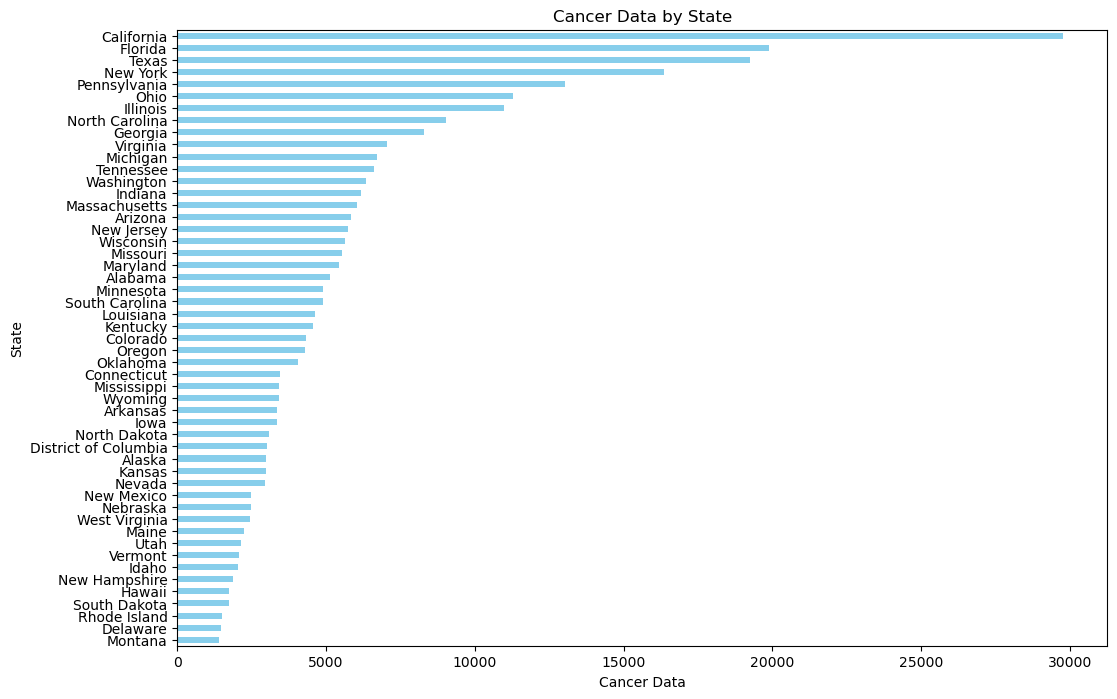

In [472]:
# plot a bar chart to visualize cancer data by estate

state_data = merged_df.groupby('State')['Cancer Data'].sum().sort_values()
state_data.plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title("Cancer Data by State")
plt.xlabel("Cancer Data")
plt.ylabel("State")
plt.show()

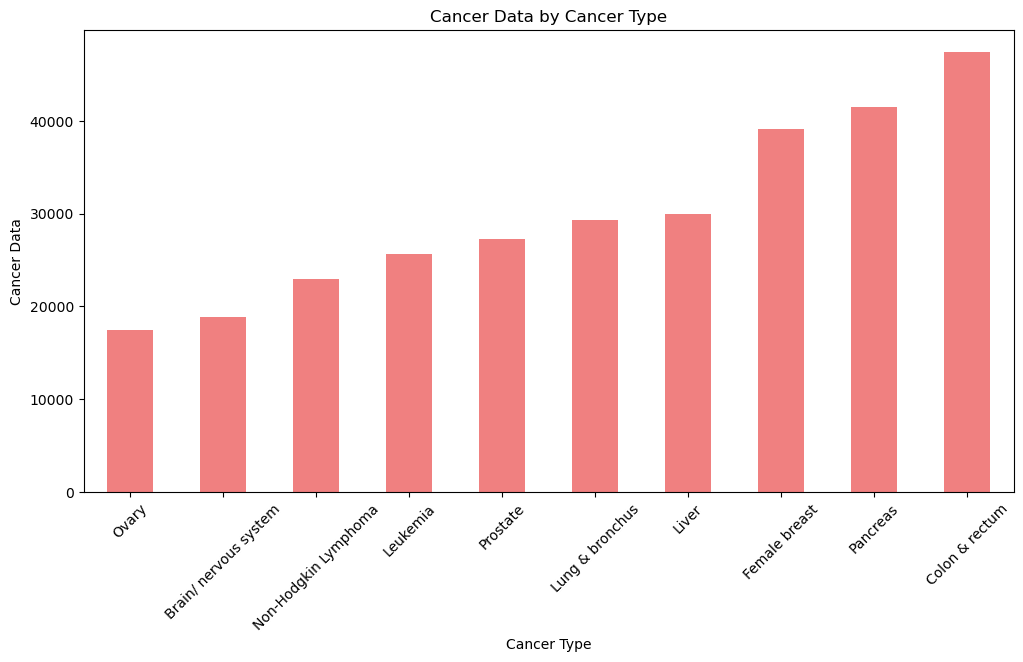

In [473]:
# distribution by cancer 

cancer_type_data = merged_df.groupby('Cancer Type')['Cancer Data'].sum().sort_values()
cancer_type_data.plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title("Cancer Data by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Cancer Data")
plt.xticks(rotation=45)
plt.show()

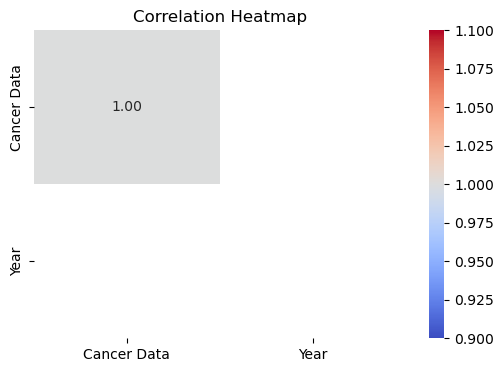

In [474]:
# Correlation heatmap
correlation = merged_df[['Cancer Data', 'Year']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

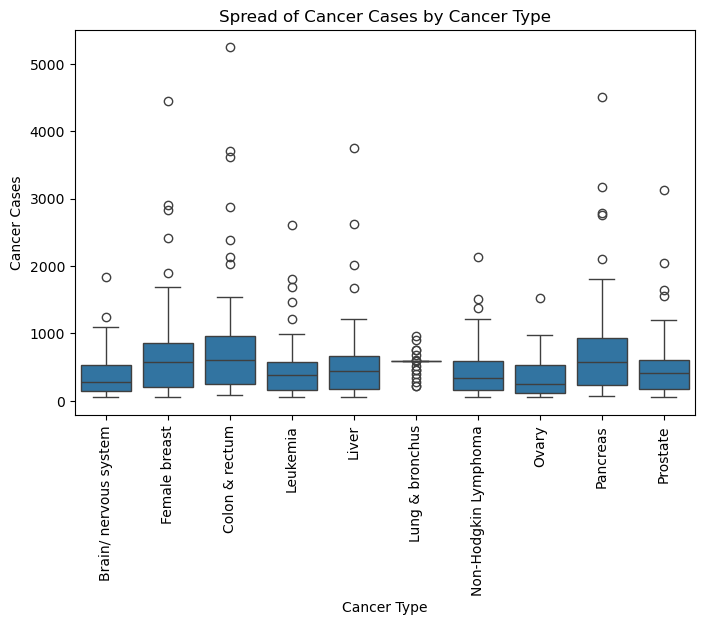

In [510]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Cancer Type', y='Cancer Data')
plt.xticks(rotation=90)
plt.title('Spread of Cancer Cases by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Cancer Cases')
plt.show()

In [296]:
# statistical summary for cancer data

print("Statistical Summary for Cancer Data:")
print(merged_df['Cancer Data'].describe())

Statistical Summary for Cancer Data:
count     510.000000
mean      587.114094
std       653.006011
min        50.000000
25%       200.000000
50%       450.000000
75%       640.000000
max      5240.000000
Name: Cancer Data, dtype: float64


In [298]:
# top estates with the highest cancer rates

top_states = merged_df.groupby('State')['Cancer Data'].sum().nlargest(10)
print("Top 10 States with Highest Cancer Cases:")
print(top_states)

Top 10 States with Highest Cancer Cases:
State
California        29767.114094
Florida           19887.114094
Texas             19257.114094
New York          16347.114094
Pennsylvania      13017.114094
Ohio              11287.114094
Illinois          10987.114094
North Carolina     9027.114094
Georgia            8277.114094
Virginia           7037.114094
Name: Cancer Data, dtype: float64


In [302]:
# Select numeric columns for correlation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

In [304]:
# Calculate correlation matrix
correlation = numeric_columns.corr()

In [306]:
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
             Cancer Data
Cancer Data          1.0


In [512]:
# Save the merged dataset as a CSV file
merged_df.to_csv('merged_cancer_data.csv', index=False)

print("Merged dataset has been saved successfully!")

Merged dataset has been saved successfully!
